# **Project Name**    - UBER SUPPLY AND DEMAND ANALYSIS



# **Project Summary -**

This project presents an in-depth Exploratory Data Analysis (EDA) of Uber ride request data collected over a five-day period, focusing on trips between the city and the airport.The goal of this project was to perform a deep exploratory data analysis (EDA) on Uber ride request data to uncover service inefficiencies, understand user demand patterns, and identify gaps in driver availability. By leveraging visualization and statistical insights, the project aims to guide strategic improvements in Uber's ride allocation and resource planning.

# **GitHub Link -**

# **Problem Statement**


Despite being a widely used ride-sharing platform, Uber often faces issues such as unfulfilled ride requests, high cancellation rates, and unavailability of cars during peak hours. These challenges, particularly visible during early mornings and evenings, result in poor customer experience and lost revenue. There is a need to understand when and where these inefficiencies occur in order to optimize driver availability and improve the overall operational efficiency of the platform.

#### **Define Your Business Objective?**

1. Analyze Uber ride request data to identify patterns in demand and supply.

2. Detect time slots and pickup points (City vs Airport) with the highest ride failures.

3. Understand the reasons behind failed requests — cancellations or no car availability.

4. Measure trip completion rates during different times of the day and days of the week.

5. Compare driver performance to identify high and low-performing drivers.

6. Identify supply-demand mismatches across locations and peak hours.

7. Recommend ways to improve driver allocation based on demand trends

8. To enhance customer satisfaction, reduce revenue loss, and improve service reliability through data-driven decision-making.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





## ***1. Know Your Data***

### Import Libraries

In [155]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


### Dataset Loading

In [156]:
# IMPORT THE DATASET
# The following data has gone through primary 
data = pd.read_csv('Uber Request Data.csv')


### Dataset First View

In [157]:
# Dataset First Look
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [158]:
# Dataset Rows & Columns count
print(data.shape)


print("\n The data set contains",data.shape[0],"row and",data.shape[1],"columns")

(6745, 6)

 The data set contains 6745 row and 6 columns


### Dataset Information

In [64]:
# Dataset Info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


 There are 6745 rows and 13 columns in total. Most columns have complete data, but some like Driver ID and Drop timestamp have missing values which needs to me examined for further insights.

#### Duplicate Values

In [65]:

print("Total duplicate rows:", data.duplicated().sum())

Total duplicate rows: 0


This can be verified once by checking for duplicate values in excel using formatting tools the output results are displayed below.

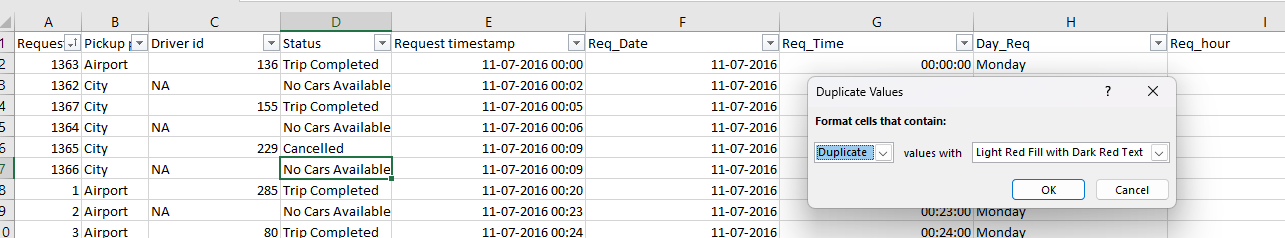

On filtering there was no ID recovered that was a duplicate

#### Missing Values/Null Values

In [66]:

# Count of missing values in each column
missing_values=data.isna()
print("Missing values in each column:\n",missing_values.sum())
print("Total missing value in the whole dataset",missing_values.sum().sum())

Missing values in each column:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
Total missing value in the whole dataset 6564


In [67]:

missing_percent = (missing_values.sum() / len(data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percent)


Percentage of missing values in each column:
 Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


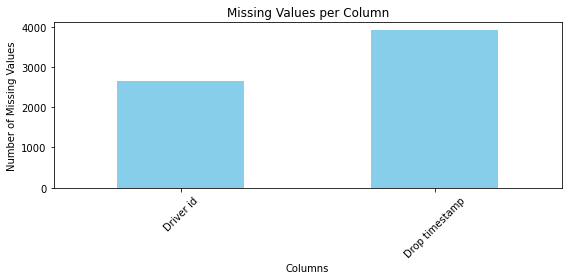

In [44]:
# Visualizing the missing values
missing_counts = data.isnull().sum()

# Filter columns with at least one missing value
missing_counts = missing_counts[missing_counts > 0]

# Plot
missing_counts.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## ***2. Understanding Your Variables***

In [68]:
# Dataset Columns
print(data.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [69]:
# Dataset Describe
data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

1) Request id: Unique code given as an identifier for a request

2) Pickup point: The point from which the request was made

3) Driver id: The unique identification number of the driver

4) Status: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

5) Request timestamp: The date and time at which the customer made the trip request



6) Drop timestamp: The drop-off date and time, if the trip was completed



### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.

data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [159]:
# On entering the name of the column the uniques value will be displayed
col_name = input("Enter the column name to see its unique values: ")

# Check if the column exists
if col_name in data.columns:
    unique_vals = data[col_name].unique()
    print(f"\nUnique values in '{col_name}':\n{unique_vals}")
else:
    print("\n Column name not found. Please check for typos or use one of these:")
    print(list(data.columns))



Enter the column name to see its unique values: Status

Unique values in 'Status':
['Trip Completed' 'Cancelled' 'No Cars Available']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [246]:
## The had gone through some manipulation and filtering using excel and the dataset is as follows:
data = pd.read_excel('uber_excel.xlsx')
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Req_Date,Req_Time,Day_Req,Req_hour,Drop timestamp
0,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11,00:00:00,Monday,0,2016-07-11 01:11:00
1,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,2016-07-11,00:02:00,Monday,0,NaT
2,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11,00:05:00,Monday,0,2016-07-11 01:06:00
3,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,2016-07-11,00:06:00,Monday,0,NaT
4,1365,City,229.0,Cancelled,2016-07-11 00:09:00,2016-07-11,00:09:00,Monday,0,NaT


In [247]:
data.info()
data.shape
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Req_Date           6745 non-null   datetime64[ns]
 6   Req_Time           6745 non-null   object        
 7   Day_Req            6745 non-null   object        
 8   Req_hour           6745 non-null   int64         
 9   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 527.1+ KB


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Req_Date', 'Req_Time', 'Day_Req', 'Req_hour',
       'Drop timestamp'],
      dtype='object')

Req_Time seems to require formatting as they are read as object(text).This step helps us understand what further cleaning and formatting needs to be done in the data

In [234]:
# Write your code to make your dataset analysis ready.
## We can first format the Req_hour from text to time
data['Req_Time'] = pd.to_datetime(data['Req_Time'], errors='coerce').dt.time


In [235]:
# Remove space between column names
data.columns = [col.replace(' ', '_') for col in data.columns]

data=data.drop(['Req_Time'], axis=1)
data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Req_Date,Day_Req,Req_hour,Drop_timestamp
0,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11,Monday,0,2016-07-11 01:11:00
1,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,2016-07-11,Monday,0,NaT
2,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11,Monday,0,2016-07-11 01:06:00
3,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,2016-07-11,Monday,0,NaT
4,1365,City,229.0,Cancelled,2016-07-11 00:09:00,2016-07-11,Monday,0,NaT


In [87]:
data.describe()

,Request_id,Driver_id,Req_hour
count,6745.000000,4095.000000,6745.000000
mean,3384.644922,149.501343,12.956709
std,1955.099667,86.051994,6.504052
min,1.000000,1.000000,0.000000
25%,1691.000000,75.000000,7.000000
50%,3387.000000,149.000000,13.000000
75%,5080.000000,224.000000,19.000000
max,6766.000000,300.000000,23.000000


From the $Req$_ $hour$ column we see that:
1) On an average requests were made arround 1:00 pm(12:95)

2) Also we see that 50% request were made between 7:00 am to 7:00 pm(Interquartile range) and since the median request hour is 13 (1:00 PM), it also suggests that most ride requests occurred before this time.

In [236]:
# To make data more insightful we can add a new column that will give the time slot of the day the reuest was made:

def get_time_slot(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

data['Time_Slot'] = data['Req_hour'].apply(get_time_slot)
data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Req_Date,Day_Req,Req_hour,Drop_timestamp,Time_Slot
0,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11,Monday,0,2016-07-11 01:11:00,Late Night
1,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,2016-07-11,Monday,0,NaT,Late Night
2,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11,Monday,0,2016-07-11 01:06:00,Late Night
3,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,2016-07-11,Monday,0,NaT,Late Night
4,1365,City,229.0,Cancelled,2016-07-11 00:09:00,2016-07-11,Monday,0,NaT,Late Night


### New variables:
6) Req_Date: The date of request 

7) Day_Req: Day on which request was made

8) Req_hour: The hour of the day when the request was made(1 standing for 1:00 am and 13 for 1:00 pm)

9) Time_Slot: The time of the day (Morning/Evening)

Late Night: Midnight to 4AM
    
Early Morning: 4AM-8AM
    
Late Morning: 8AM-Noon
    
Afternoon: Noon-4PM
    
Evening: 4PM-8PM
    
Night: 8PM-Midnight

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Total number of request made per time slot of the day ( Demand)

Late Night        375
Early Morning    1452
Late Morning     1268
Afternoon         651
Evening          1560
Night            1439
Name: Time_Slot, dtype: int64


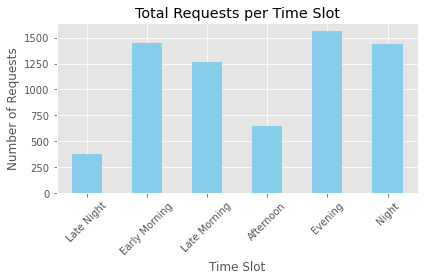

In [172]:
# Chart - 1 visualization code

# Count total number of requests in each time slot
time_order = ['Late Night', 'Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night']

# Count values and reorder
time_slot_counts = data['Time_Slot'].value_counts().reindex(time_order)

time_slot_counts.columns = ['Time_Slot', 'Total_Requests']

# Display the table
print(time_slot_counts)




# Plot
time_slot_counts.plot(kind='bar', color='skyblue')

plt.title('Total Requests per Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above dataset has mostly categorical variables and so using a bar chart is one of the most effective way to visualize and analyse the data.In the above plot we can visualize the demand for Uber cars during different time slots of the day.Using this we can identify the peak hours of the day.

##### 2. What is/are the insight(s) found from the chart?

1)From the above chart as well as the table its clearly visible that most ride request happen during evening( 4 pm to 8pm )and night(8 pm to midnight) followed by early moring and late morning.

2)Late Night (12 AM to 4 AM) has the lowest number of requests (375), which is expected due to the odd hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes the following insights can be used in better working of the business:
1) As observered the peak hours are mostly during the period(4pm to 4 am) that is Evening, Night, and Early Morning slots.So to make it more efficient and for optimization of the supply and demand more drivers can be allocated during these peak hours.

2) Providing incentives to drivers for accepting request during peak hours can also increase the willingness of the drivers to take up the request and adjusting their working hours to earn more.




#### Chart - 2 Total request on a given weekday (Demand distribution in a weekday)

         Day  Total_Requests
0     Monday            1367
1    Tuesday            1307
2  Wednesday            1337
3   Thursday            1353
4     Friday            1381


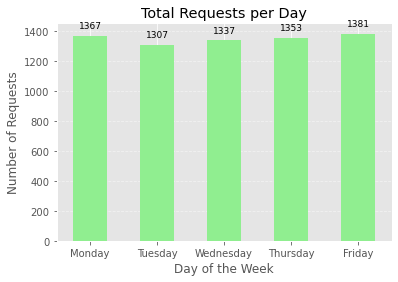

In [173]:


# Count total requests per day
day_request_counts = data['Day_Req'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)


# Display the table
print(day_request_df)

# Plot
day_request_counts.plot(kind='bar', color='lightgreen')

plt.title('Total Requests per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels on bars
for i, value in enumerate(day_request_counts):
    plt.text(i, value + 50, str(value), ha='center', fontsize=9)


plt.show()


##### 1. Why did you pick the specific chart?

It provides a clear visual representation of the distribution of Uber ride requests across different weekdays, allowing easy comparison of daily demand.

##### 2. What is/are the insight(s) found from the chart?

We see that the distiribution is almost uniform across  days with friday having the highest demand followed by monday.

##### 3. Will the gained insights help creating a positive business impact?

As the number of requests remains relatively consistent throughout the work week Uber can try to allocate few more drivers on monday and friday where the demand is slightly high.

#### Chart - 3 The trip status distribution

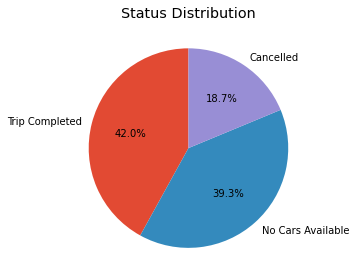

In [174]:
# Plot 3: Status Pie Chart
data['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Status Distribution", startangle=90)
plt.ylabel("")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing the proportion of categories as a whole. The chart  clearly illustrates how much each status contributes to the total number of requests made between city and airport

##### 2. What is/are the insight(s) found from the chart?

1) Only 42% of total requests resulted in a Trip Completed.

2) A high 39.3% of requests failed due to No Cars Available.

3) About 18.7% of the rides were Cancelled.



 ##### Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So we see that less than 50% were deemed completed this is clear case of increasing operational efficiency.This insight strongly supports the need for optimizing driver allocation, improving service availability.

The high percentage of requests marked as "No Cars Available" (39.3%) and "Cancelled" (18.7%) indicates a failure to meet customer demand.

The large share of unfulfilled requests (especially due to "No Cars Available") signals lost revenue opportunities and potential customer dissatisfaction, which can hurt long-term growth if not addressed.

Uber has to focus more on an optimised driver allocation to rides to  and from city to airport

#### Chart - 4  Request made based on pickup point

City       3507
Airport    3238
Name: Pickup_point, dtype: int64


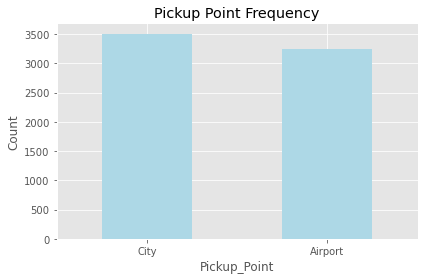

In [207]:

# Plot 4: Pickup Point
data['Pickup_point'].value_counts().plot(kind='bar', title="Pickup Point Frequency", color='lightblue')
print(data['Pickup_point'].value_counts())
plt.xlabel("Pickup_Point")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1) Why did you pick the specific chart?

As this is a univariate variable the analysis visualization can be better done using bar charts

##### 2) What is/are the insight(s) found from the chart?

We see most request are made from city to airport than airport to city.This is a keep insight as the analysis is done on the supply demand issue in rides to and from city to airport.

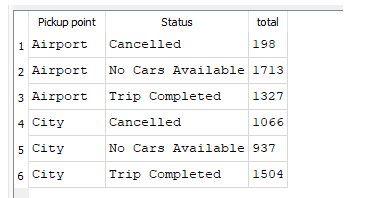

From the table we see that more cancellation happens at city than from airport.But car availability issue tend to be more at airport than city

##### Will the gained insights help creating a positive business impact?

We see that there is more request happening from city than airport.So there is more demand for cars from city to airport than vice verse.So this demand needs to be met.





##### Chart 5- Ride status by pickup point

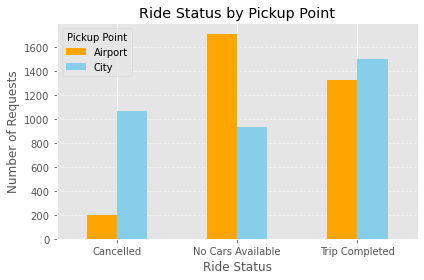

In [222]:

grouped_df = data.groupby(['Pickup_point', 'Status']).size().reset_index(name='total')


pivot_df = grouped_df.pivot(index='Status', columns='Pickup_point', values='total')


pivot_df.plot(kind='bar', color=['orange', 'skyblue'])  # Adjust colors if needed

plt.title('Ride Status by Pickup Point')
plt.xlabel('Ride Status')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

We see that cancellation is more at city than from the airport.But the issue of non availability of car is seen more in the airport than city.Trip completion is more from city than from airport

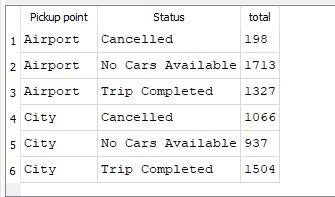

##### Will the gained insights help creating a positive business impact?
We see that there is more request happening from city than airport.So there is more demand for cars from city to airport than vice verse.

Airport pickup issues are mostly due to “No Cars Available” (1713 cases — very high).

City pickup issues are more due to “Cancelled” rides (1066 cases).

The City has slightly more completed trips (1504) than the Airport (1327).

##### Chart 6- Number of Requests by Pickup Point across Time Slots

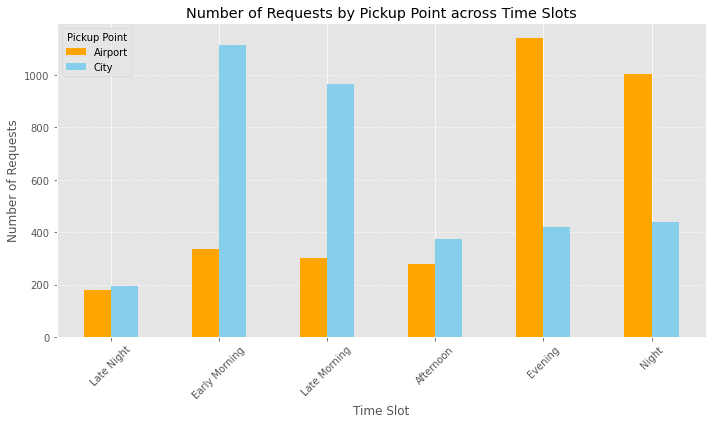

In [223]:
grouped = data.groupby(['Time_Slot', 'Pickup_point']).size().reset_index(name='Total_Requests')

# Step 2: Pivot the data for plotting
pivot_df = grouped.pivot(index='Time_Slot', columns='Pickup_point', values='Total_Requests').reindex(time_order)

# Step 3: Plot
pivot_df.plot(kind='bar', figsize=(10,6), color=['orange', 'skyblue'])

plt.title('Number of Requests by Pickup Point across Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

###### 1. Why did you pick the specific chart?
This grouped bar chart clearly shows how the number of ride requests varies by Pickup Point (City vs Airport) over different Time Slots. It helps visualize time-based demand patterns for both locations side-by-side.This helps to understand where the demand is more at particular time.

###### 2. What is/are the insight(s) found from the chart?
City has the highest demand during Early Morning and Late Morning, which suggests a surge in rides to the airport.

Airport sees a sharp increase in requests during the Evening and Night.

The Late Night slot shows nearly equal requests from both City and Airport but in lower volume.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Positive Business Impact:

Uber can use this insight to optimize driver allocation:

Send more cars to the City in the morning to handle airport rides as demand from city is more during this hour

Deploy more drivers at the Airport in the evening/night to meet return demand.

Matching supply with demand will improve customer satisfaction, trip completion rates, and revenue.

Ignoring these time-location trends can lead to driver shortages in high-demand slots, increasing cancellations or “No Cars Available” .

#### Chart - 7 Ride Status by time slot

Status         Cancelled  No Cars Available  Trip Completed
Time_Slot                                                  
Late Night            14                225             136
Early Morning        541                307             604
Late Morning         430                279             559
Afternoon             69                182             400
Evening              105                883             572
Night                105                774             560


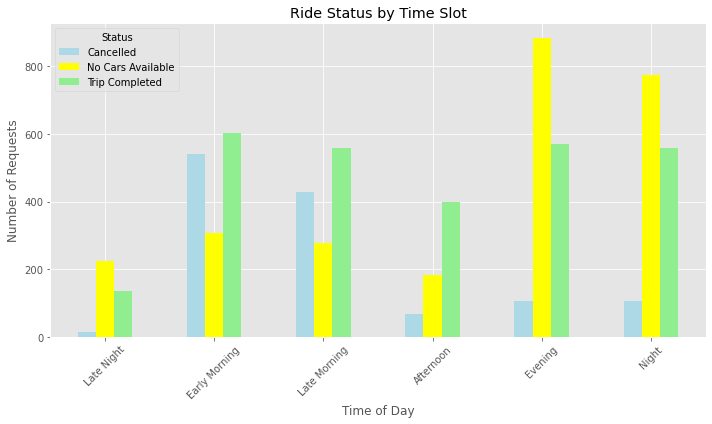

In [209]:
time_order = ['Late Night', 'Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night']
# Group data by Time Slot and Status and count
summary_table = data.groupby(['Time_Slot', 'Status']).size().unstack().fillna(0).reindex(time_order)

# Display the table
print(summary_table)

# Plot
summary_table.plot(kind='bar', figsize=(10,6),color=['lightblue', 'yellow',"lightgreen"])

plt.title('Ride Status by Time Slot')
plt.xlabel('Time of Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a grouped bar chart to compare how each ride status varies across different time slots in a single view.In the previous graph we saw the demand duing differnt time slot.The following chart can be used if the demand is met or if the issue of sufficent supply exsist.It helps visually capture which time slots have the highest ride failures and which are most efficient in terms of trip completions.Also as we saw demand increase during specific time of the day it is necessay to check it the demand is met during the hour.

##### 2. What is/are the insight(s) found from the chart?

1) Evening and Night slots have very high “No Cars Available” values (especially evening with 883 requests).This should be read along the fact that evening and night is considered the busiest hour as the demand is higher during this time.The trip completion is also less during this hour.Also this explains how the increasing demand for car at the hour in the airport is not met efficiently.

2) Early Morning has a large number of cancelled rides (541) compared to other hours but the completion rate is also high during this hour.

3) Cancellation is less during evening and night hours but the supply of cars is less.


4) Late Night has the lowest overall volume of rides, but still shows a notable number of failed request

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can use this data to redistribute drivers more effectively by time of day.For example, during Evening and Night when the demand is high Uber can add surge pricing or provide driver incentives to cover the high demand and reduce “No Cars Available”.

In Early Morning, Uber can investigate reasons behind high cancellations       

High failure rates in Evening, Night, and Early Morning slots especially from airport return rides lead to missed revenue, user dissatisfaction, and possible brand trust issues.

#### Chart - 8  Cancelled Rides by Time Slot and Pickup Location

Pickup_point   Airport   City
Time_Slot                    
Late Night         0.0   14.0
Early Morning     15.0  526.0
Late Morning      24.0  406.0
Afternoon         36.0   33.0
Evening           63.0   42.0
Night             60.0   45.0


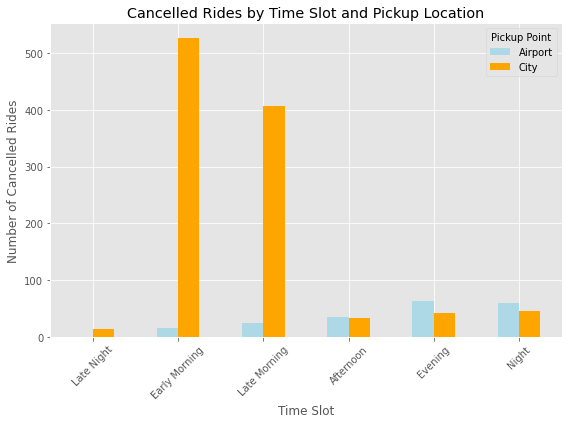

In [211]:
#Filter out cancelled rides
cancelled_data = data[data['Status'] == 'Cancelled']
time_order = ['Late Night', 'Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night']

cancelled_summary = cancelled_data.groupby(['Time_Slot', 'Pickup_point']).size().unstack().fillna(0).reindex(time_order)
print(cancelled_summary)
#Plot the data
cancelled_summary.plot(kind='bar', figsize=(8,6), color=['lightblue', 'orange'])

plt.title('Cancelled Rides by Time Slot and Pickup Location')
plt.xlabel('Time Slot')
plt.ylabel('Number of Cancelled Rides')
plt.xticks(rotation=45)
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

As we know from the previous chart the cancellation tends be higher in the morning than during peak hours from evening to night.So to the understand the cancellation pattern better we further study the case by checking if more cancellation happens for riders at airport or in the city.

##### 2. What is/are the insight(s) found from the chart?

1) As we know the cancellations are high during the morning hours(4 am-noon) and the above chart confirms that most of the cancellation happens from city to airport.So there is a clear time-based cancellation pattern heavily concentrated around morning hours for City pickups.

2) Airport cancellations remain very low throughout all time slots, never exceeding 63

3) Late Night cancellations from the City are nearly zero, but rise again slightly in Evening and Night

##### 3. Will the gained insights help creating a positive business impact?

Uber should focus on Early Morning and Late Morning rides from the City, where most cancellations happen.These cancellations might be due to not enough drivers, long wait times, or delays.

Uber can improve driver matching algorithms, introduce penalties for frequent cancellations, or provide incentives to complete early-morning city rides.Solving this issue can help complete more rides, keep customers happy, and increase daily earnings.

If these cancellations are not fixed, customers may get angry or lose trust in Uber and may opt for alternatives.



#### Chart-9 Cancellation by hour

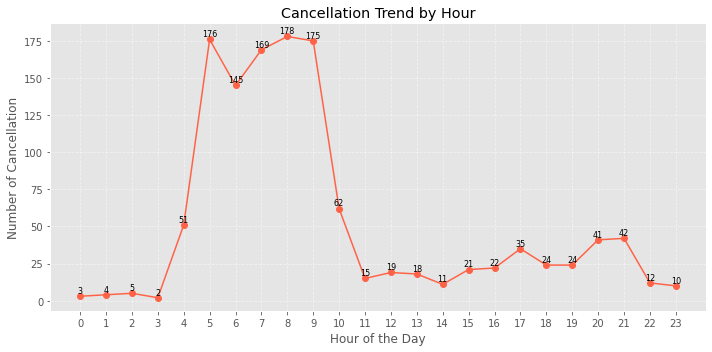

In [181]:
# Filter only 'Cancelled' cases
no_car_data = data[data['Status'] == 'Cancelled']

# Count number of such requests by hour
no_car_hourly = no_car_data['Req_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(no_car_hourly.index, no_car_hourly.values, marker='o', linestyle='-', color='tomato')
plt.title('Cancellation Trend by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Cancellation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()

# Add data labels
for i, value in enumerate(no_car_hourly.values):
    plt.text(no_car_hourly.index[i], value + 2, str(value), ha='center', fontsize=8)

plt.show()

##### 1. Why did you pick the specific chart?

We know from the previous graphs that cancellation happen max in the morning so a line chart plotting the trend in cancellation with hour can be used identify the specific hours in which most cancellation happen.

##### 2. What is/are the insight(s) found from the chart?

Cancellations skyrocket between 5 AM and 9 AM, with a peak at 7 AM and 8 AM (around 175–178 cancellations).

After 9 AM, cancellations drop sharply and stay low throughout the day and night.

This shows that morning hours have a serious problem with ride cancellations.

##### 3. Will the gained insights help creating a positive business impact?

By focusing on the high number of cancellations between 5 AM and 9 AM, Uber can take simple steps like adding more drivers, giving morning incentives, and improving driver matching. These changes can reduce failed rides, make customers happier, and increase earnings during busy hours.

#### Chart-10 Non car availability by Time Slot and Pickup Location

Pickup_point   Airport  City
Time_Slot                   
Late Night         114   111
Early Morning       44   263
Late Morning        34   245
Afternoon           55   127
Evening            801    82
Night              665   109


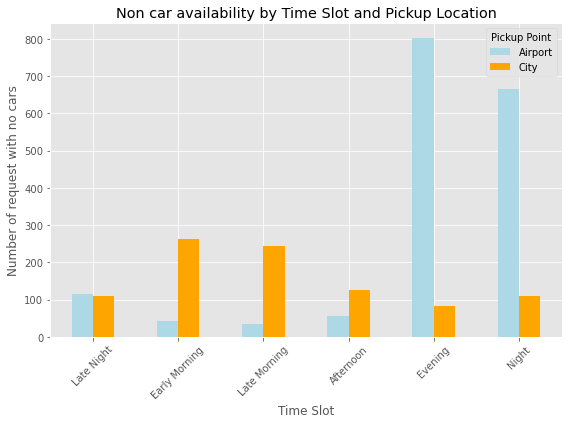

In [212]:
#Filter out no cars available
cancelled_data = data[data['Status'] == 'No Cars Available']

cancelled_summary = cancelled_data.groupby(['Time_Slot', 'Pickup_point']).size().unstack().fillna(0).reindex(time_order)
print(cancelled_summary)
#Plot the data
cancelled_summary.plot(kind='bar', figsize=(8,6), color=['lightblue', 'orange'])

plt.title('Non car availability by Time Slot and Pickup Location')
plt.xlabel('Time Slot')
plt.ylabel('Number of request with no cars')
plt.xticks(rotation=45)
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

As in the case of ride cancellation non availability of cabs is a serious issue and it was found to be more during the evening and night when the demand is high especially from our knowledge the demand is high at airport during ths hour.So this chart can help in identifying if the demand is met with supply.

##### 2 What is/are the insight(s) found from the chart?

The Airport faces the highest number of “No Cars Available” issues during the Evening (801) and Night (665).This is exactly when the demand for rides is more at the airport.

The City has more “No Cars Available” reports during Early Morning (263) and Late Morning (245).Exactly during these hour are the demand for rides more from city.

This shows a clear time-location mismatch in vehicle availability:

1) City needs more cars in the morning.

2) Airport needs more cars in the evening and night.

##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Positive Business Impact:
Uber can optimize driver supply by:

1) Sending more drivers to the Airport during evening and night.

2) Focusing driver availability in the City during morning hours.

This will help reduce the number of unserved ride requests, improve customer experience, and increase revenue from peak-time demand.

Negative Growth Risk:
If not addressed, the lack of available cars at key hours and locations will causeLost revenue opportunities,Frustrated users, especially at airports and a possible shift to competitor apps with more reliable service.



#### Chart - 11 No Car Availability Trend by Hour

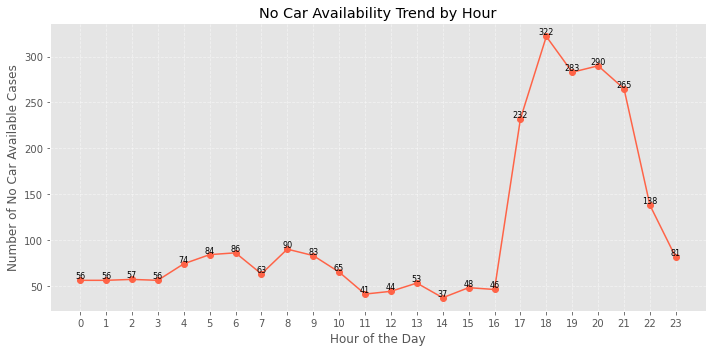

In [180]:
# Filter only 'No Cars Available' cases
no_car_data = data[data['Status'] == 'No Cars Available']

# Count number of such requests by hour
no_car_hourly = no_car_data['Req_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(no_car_hourly.index, no_car_hourly.values, marker='o', linestyle='-', color='tomato')
plt.title('No Car Availability Trend by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of No Car Available Cases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()

# Add data labels
for i, value in enumerate(no_car_hourly.values):
    plt.text(no_car_hourly.index[i], value + 2, str(value), ha='center', fontsize=8)

plt.show()

##### 1. Why did you pick the specific chart?
This line chart shows the number of "No Car Available" cases by each hour of the day. It’s chosen because it clearly highlights peaks and trends in driver unavailability over time, helping to pinpoint when supply fails to meet demand.

##### 2. What is/are the insight(s) found from the chart?
From 17:00 to 21:00 (5 PM to 9 PM), there is a sharp rise in cases where no cars are available.

The highest spike is at 18:00 (6 PM), with over 320 unserved requests.

During early hours (00:00–16:00), the number remains consistently low.

##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Positive Business Impact:
Uber can use this insight to pre-position more drivers during evening hours (especially 5–9 PM), when demand exceeds supply.
Addressing this will increase ride availability, reduce customer frustration, and boost revenue in a high-demand time window.This also shows that supply demand issue is more prominent at airport in the evening than the issue faced at city at morning.The airport issue needs to addressed immediately.




#### Chart - 12

Status     Cancelled  No Cars Available  Trip Completed
Day_Req                                                
Monday           262                504             601
Tuesday          240                505             562
Wednesday        270                490             577
Thursday         252                571             530
Friday           240                580             561


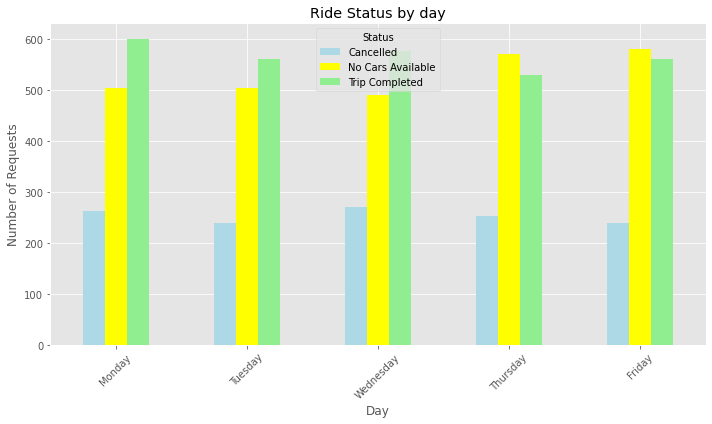

In [237]:
# Group data by Time Slot and Status and count
summary_table = data.groupby(['Day_Req', 'Status']).size().unstack().fillna(0).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)


# Display the table
print(summary_table)

# Plot
summary_table.plot(kind='bar', figsize=(10,6),color=['lightblue', 'yellow',"lightgreen"])

plt.title('Ride Status by day')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

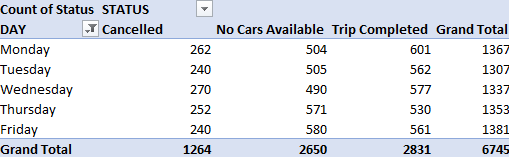


##### 1. Why did you pick the specific chart?
This grouped bar chart clearly compares ride outcomes — Trip Completed, Cancelled, and No Cars Available — across each weekday. It’s ideal for identifying which days face more service failures and when Uber is performing well.

##### 2. What is/are the insight(s) found from the chart?
Monday has the highest number of completed rides (601), showing strong operational efficiency.

Friday and Thursday have higher unavailability (580 and 571 respectively) and more cancellations compared to other weekdays.

Wednesday shows relatively balanced performance, with lower “No Cars Available” cases and the second-highest trip completions.
##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
If Uber can replicate Monday’s efficiency across other days—especially by improving driver availability and reducing cancellations—they can boost customer satisfaction and revenue. However, if high cancellation and no-car issues on Thursdays and Fridays continue, it may frustrate users, hurt reliability, and push customers toward competitors before the weekend rush.

#### Chart -13 Number of Uber Requests Per Hour

0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Req_hour, dtype: int64


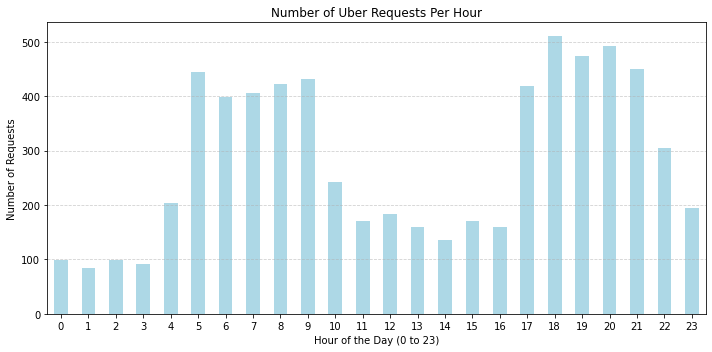

In [95]:
# Chart - 5 visualization code
import pandas as pd


# Count the number of requests per hour
hourly_counts = data['Req_hour'].value_counts().sort_index()

# Display the result
print(hourly_counts)

plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='lightblue')

plt.title('Number of Uber Requests Per Hour')
plt.xlabel('Hour of the Day (0 to 23)')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?
A bar chart is ideal to show frequency across ordered time (hours of the day). It helps identify peak and off-peak request periods clearly.

##### 2. What is/are the insight(s) found from the chart?
There are two clear peaks: one in the morning (5 AM to 9 AM) and another in the evening (5 PM to 9 PM).

Highest demand is observed at 6 PM (510 requests), followed by 8 PM (492 requests).

Very low demand is seen from midnight to 4 AM.

##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?
Knowing the peak hours allows Uber to plan driver shifts more efficiently, especially during commuting hours. Ensuring car availability during these high-demand windows can significantly increase trip completions and customer satisfaction. 

#### Chart - 14  'Driver-wise Ride Status of Top 10 Drivers

In [98]:
# Chart - 6 visualization code

# Filter out rows where Driver ID is not available (to keep only assigned rides)
assigned_data = data[data['Driver_id'].notna()]

# Group by Driver ID and Status, then count
driver_status_counts = assigned_data.groupby(['Driver_id', 'Status']).size().unstack(fill_value=0)

# Show the first few rows
print(driver_status_counts.head())




Status     Cancelled  Trip Completed
Driver_id                           
1.0                4               9
2.0                4               9
3.0                4              10
4.0                5              10
5.0                2              11


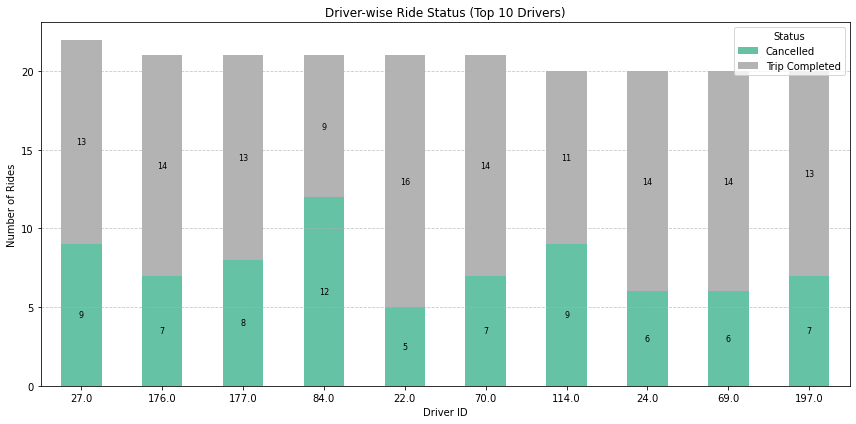

In [103]:
# Top 10 drivers by total rides
top_drivers = driver_status_counts.sum(axis=1).sort_values(ascending=False).head(10)
top_driver_data = driver_status_counts.loc[top_drivers.index]

# Plot and store the axis
ax = top_driver_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Plot formatting
plt.title('Driver-wise Ride Status (Top 10 Drivers)')
plt.xlabel('Driver ID')
plt.ylabel('Number of Rides')
plt.legend(title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?
A stacked bar chart is perfect to compare both the number of completed rides and cancellations for each driver in one view. It highlights individual performance and inconsistencies clearly.

##### 2. What insight(s) are found from the chart?
Some drivers like Driver 84 have high cancellation counts, suggesting possible reliability or availability issues.

Drivers like 176, 22, and 177 have a good number of completed trips, showing better reliability.

There's inconsistency in driver performance across the board, with several drivers having 6–9 cancelled rides.

##### 3. Will the gained insights help create a positive business impact? Are there any risks of negative growth?

Uber can use this data to reward consistently performing drivers and identify drivers needing support or training.This can improve service quality and customer satisfaction.



#### Chart-15 Top 10 Drivers by Trips Completed

Top 10 Drivers by Completed Trips:

   Driver ID  Number of Completed Trips
0       22.0                         16
1      233.0                         15
2      184.0                         15
3      126.0                         14
4      107.0                         14
5      105.0                         14
6      212.0                         14
7      109.0                         14
8       24.0                         14
9       23.0                         14


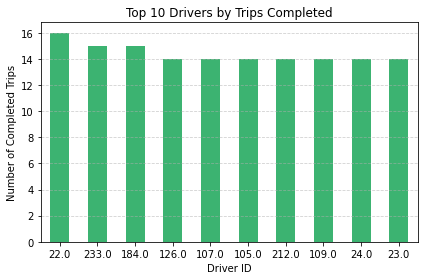

In [128]:

# Filter completed trips with valid Driver ID
completed_trips = data[(data['Status'] == 'Trip Completed') & (data['Driver_id'].notna())]

# Group by Driver ID and count completed trips
completed_by_driver = completed_trips.groupby('Driver_id').size().sort_values(ascending=False)

# Create a DataFrame from the Series
completed_table = completed_by_driver.reset_index()
completed_table.columns = ['Driver ID', 'Number of Completed Trips']

# Display the table
print("Top 10 Drivers by Completed Trips:\n")
print(completed_table.head(10))

# Plot the top 10
top_completed = completed_table.head(10).set_index('Driver ID')
top_completed.plot(kind='bar', color='mediumseagreen', legend=False)

plt.title('Top 10 Drivers by Trips Completed')
plt.xlabel('Driver ID')
plt.ylabel('Number of Completed Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### 1. Why did you pick this chart?
A vertical bar chart is ideal to show a direct comparison of completed trips per driver, making it easy to identify top-performing drivers.

##### 2. What insights are found from the chart?
Driver 22 completed the most trips (16), followed closely by others with 14–15 trips.

The top drivers have similar performance levels, indicating consistency in the active driver pool.

##### 3. Will the insights help create a positive business impact? Are there any risks?

Uber can recognize and reward top drivers, encouraging high performance and retention.These drivers can also be scheduled during peak hours or high-demand zones for better efficiency.

#### Chart - 16 Top 5 Drivers with Most Cancellations

Top Drivers with Most Cancellations:
Driver_id
84.0     12
54.0     11
206.0    10
142.0    10
267.0     9
166.0     9
114.0     9
138.0     9
210.0     9
27.0      9
dtype: int64


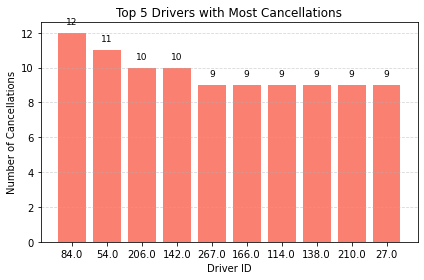

In [115]:
# Chart - 7 visualization code

# Filter only cancelled rides with assigned drivers
cancelled_rides = data[(data['Status'] == 'Cancelled') & (data['Driver_id'].notna())]

# Group by Driver id and count cancellations
cancelled_by_driver = cancelled_rides.groupby('Driver_id').size().sort_values(ascending=False)

# Display top drivers with most cancellations
print("Top Drivers with Most Cancellations:")
print(cancelled_by_driver.head(10))



# Select top 5 drivers
top10_cancelled = cancelled_by_driver.head(10)

# Plot
plt.bar(top10_cancelled.index.astype(str), top10_cancelled.values, color='salmon')

plt.title('Top 5 Drivers with Most Cancellations')
plt.xlabel('Driver ID')
plt.ylabel('Number of Cancellations')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels
for i, value in enumerate(top10_cancelled.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



##### 1.Why did you pick the specific chart?
The bar chart was chosen because it effectively visualizes the number of cancellations made by each driver, making it easy to compare individual performance. 

##### 2.What is/are the insight(s) found from the chart?

Driver with ID 84 has the highest number of cancellations at 12, followed by 54with 11.

Drivers from ID 206 to 27  have 9 or 10 cancellations, suggesting a group of drivers with equally high cancellation tendencies.
The distribution indicates that a small subset of drivers is responsible for a large number of cancellations.

##### 3.Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help the business take corrective actions such as:

Identifying and retraining or replacing high-cancellation drivers to improve customer experience.Monitoring driver performance more closely using cancellation metrics.Reducing cancellations can lead to increased customer satisfaction and better service ratings.

#### Chart - 17: Top 5 Drivers by Cancellation %

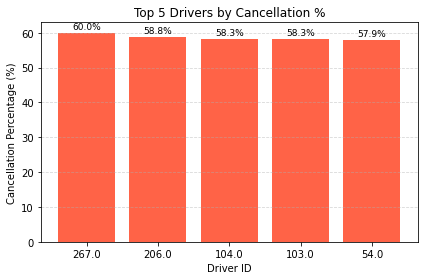

In [138]:
import matplotlib.pyplot as plt

# Filter cancelled rides with driver
cancelled = data[(data['Status'] == 'Cancelled') & (data['Driver_id'].notna())]

# Total rides per driver (any status)
total_rides = data[data['Driver_id'].notna()].groupby('Driver_id').size()

# Total cancellations per driver
cancelled_rides = cancelled.groupby('Driver_id').size()

# Calculate percentage
cancel_percent = (cancelled_rides / total_rides * 100).dropna().sort_values(ascending=False)

# Take top 5 drivers with highest cancellation %
top5_cancel_percent = cancel_percent.head(5)

# Plot
plt.bar(top5_cancel_percent.index.astype(str), top5_cancel_percent.values, color='tomato')

plt.title('Top 5 Drivers by Cancellation %')
plt.xlabel('Driver ID')
plt.ylabel('Cancellation Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add percentage labels
for i, value in enumerate(top5_cancel_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?
Driver ID 267 has the highest cancellation percentage at 60%, followed closely by others like 206, 104, 103, and 54, all hovering around 58%.

This indicates that these drivers are canceling more than half of their assigned rides, which is extremely high and unacceptable in service standards.

Some of these drivers (like 54,267 and 206) were also in the earlier chart with high absolute cancellations, showing consistent poor behavior both in volume and proportion

#### Chart - 18: Completion rate 

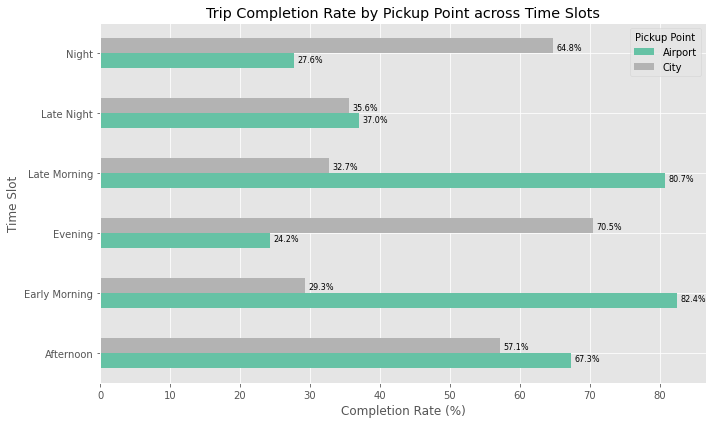

In [240]:
# Chart - 9 visualization code

completion_grp = data.groupby(['Time_Slot', 'Pickup_point'])['Status'].value_counts().unstack().fillna(0)



# Calculate Completion Rate
completion_grp['Completion Rate (%)'] = (completion_grp['Trip Completed'] / completion_grp.sum(axis=1)) * 100

completion_grp_reset = completion_grp.reset_index()

# Pivot the data to make it suitable for a horizontal bar chart
pivot_table = completion_grp_reset.pivot(index='Time_Slot', columns='Pickup_point', values='Completion Rate (%)')

# Plot
pivot_table.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title('Trip Completion Rate by Pickup Point across Time Slots')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Time Slot')
plt.legend(title='Pickup Point')
plt.tight_layout()

# Add labels
for i in range(len(pivot_table)):
    for j, pickup in enumerate(pivot_table.columns):
        rate = pivot_table.iloc[i, j]
        plt.text(rate + 0.5, i + (j-0.5)*0.2, f'{rate:.1f}%', va='center', fontsize=8)

plt.show()


##### 1. Why did you pick the specific chart?
This horizontal grouped bar chart is useful because it compares trip completion rates across different time slots and pickup points (Airport vs. City). It visually shows not just how time impacts completion, but also how the location of pickup affects driver behavior.

##### 2. What is/are the insight(s) found from the chart?
Airport pickups have significantly higher completion rates in time slots like:
   
   Early Morning (82.4%)

   Late Morning (80.7%)

   Afternoon (57.1%)

City pickups have better completion rates only during:

   Night (64.8%)

   Evening (70.5%)

The worst-performing slot is Evening for Airport pickups (24.2%), while City pickups are relatively stable across most slots except Late Morning (32.7%).

This suggests that Airport trips are prioritized in the morning, while City trips dominate the night and evening in terms of successful completion.



#### Chart-19: Uber Request Trend Over Time by Status

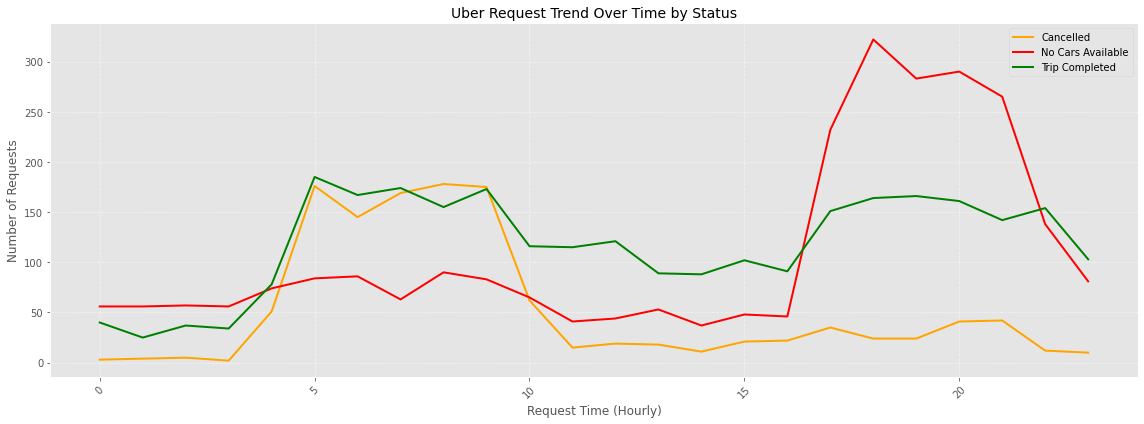

In [195]:
time_status = data.groupby(['Req_hour', 'Status']).size().reset_index(name='Count')
pivot = time_status.pivot(index='Req_hour', columns='Status', values='Count').fillna(0)
fig, ax = plt.subplots(figsize=(16, 6))

    # Colors for different statuses
color_map = {
        'Trip Completed': 'green',
        'Cancelled': 'orange',
        'No Cars Available': 'red'
    }

# Plot each status as a separate line
for status in pivot.columns:
    ax.plot(pivot.index, pivot[status], label=status, color=color_map.get(status, 'gray'), linewidth=2)

# Formatting
ax.set_title("Uber Request Trend Over Time by Status", fontsize=14)
ax.set_xlabel("Request Time (Hourly)")
ax.set_ylabel("Number of Requests")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    
    

##### 1. Why did you pick the specific chart?
This line chart was selected because it clearly shows how the status of Uber ride requests (Completed, Cancelled, No Cars Available) fluctuates over time. It provides a time-series view of user demand and service performance on an hourly basis.

##### 2. What is/are the insight(s) found from the chart?
Trip Completion (Green Line):

Highest between 5 AM to 10 AM, and again shows some stability in the late evening.

Drops slightly post 10 AM and then again after 10 PM.

No Cars Available (Red Line):

Sharp spike from 5 PM to 9 PM, peaking around 6–7 PM, indicating severe supply shortage during evening hours.
Suggests demand heavily outweighs supply in that slot.

Cancelled Trips (Orange Line):

Fairly stable but shows mild spikes during mornings.

Key Insight:
Evening hours (around 5–9 PM) are a critical problem window where most requests go unfulfilled due to no cars available, despite a continued high demand.

##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Driver Scheduling Optimization: More drivers should be made available during 5–9 PM to match high demand.

Dynamic Pricing Strategy: Introduce incentives or surge pricing to motivate drivers to stay online during peak times.

User Communication: Set proper expectations for customers during peak hours to reduce frustration and cancellations.

Demand Forecasting: Use this pattern to forecast fleet requirements more accurately.

#### Chart - 20

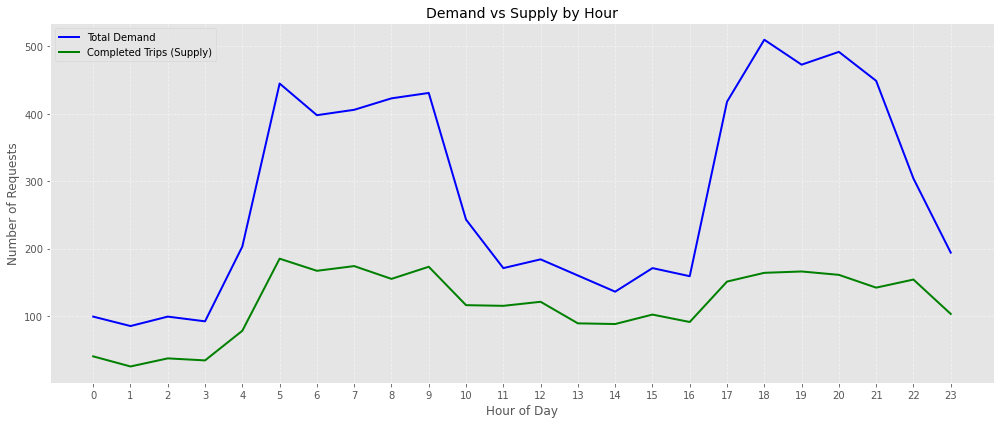

In [205]:
# Chart - 11 visualization code
import pandas as pd
import matplotlib.pyplot as plt



# Calculate demand (all requests per hour)
demand = data.groupby('Req_hour').size().reset_index(name='Total Requests')

# Calculate supply (only completed trips per hour)
supply = data[data['Status'] == 'Trip Completed'].groupby('Req_hour').size().reset_index(name='Completed Trips')

# Merge the two
hourly = pd.merge(demand, supply, on='Req_hour', how='left').fillna(0)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(hourly['Req_hour'], hourly['Total Requests'], label='Total Demand', color='blue', linewidth=2)
plt.plot(hourly['Req_hour'], hourly['Completed Trips'], label='Completed Trips (Supply)', color='green', linewidth=2)

plt.title('Demand vs Supply by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


##### Why did you pick the specific chart?
This chart was selected because it clearly contrasts the total ride demand (blue line) against the actual completed trips (green line), acting as a proxy for supply. It provides a direct visual representation of demand-supply mismatch on an hourly basis, helping stakeholders pinpoint critical gaps in operations. This is a fundamental chart for capacity planning, resource allocation, and driver incentive modeling.

###### 2. What is/are the insight(s) found from the chart?
Demand peaks occur in two major time slots:

Morning (5 AM – 10 AM) with the sharpest rise at 5 AM–6 AM

Evening (5 PM – 10 PM), peaking around 6 PM – 9 PM

Supply (completed trips) remains relatively flat throughout the day, with only minor increases during the demand peaks, failing to match the demand surges.

The biggest gap between demand and supply appears in:

Early morning (5–6 AM)

Evening (6–9 PM)

Key Insight: There is a severe supply shortage during peak hours, which the system is failing to address. Even though demand spikes, supply does not rise proportionately.

##### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Improved planning: Helps Uber reallocate drivers or add incentives during high-demand hours.

Revenue optimization: Matching supply with peak demand leads to more completed trips and less lost revenue.



### Suggestions and Recommendations to achieve Business Objective ?
Explain Briefly.

Based on the detailed EDA of Uber ride request data, the following recommendations are proposed to improve operational efficiency, reduce cancellations, and better match supply with demand:

##### 1. Improve Driver Allocation Based on Time and Location
Morning (5 AM – 10 AM): Increase the number of available drivers in the City to meet high outbound demand to the Airport.

Evening (5 PM – 9 PM): Assign more drivers to the Airport to manage inbound demand to the City.

Use historical data trends to predict and pre-position drivers at high-demand locations during peak hours.

##### 2. Reduce Cancellations
Identify and retrain drivers with high cancellation rates (e.g., Driver IDs 84, 267, 206).

Introduce driver incentives or bonuses for completing early morning city rides, which currently face the highest cancellation rates.

Improve app matching algorithms to connect riders with more reliable drivers.

##### 3. Address 'No Cars Available' Issue
During peak demand slots, activate more part-time or on-call drivers.

Consider surge pricing or dynamic pricing models to motivate driver availability during high-demand periods.

Implement real-time alerts to drivers about high-demand areas and times.

##### 4. Enhance Supply-Demand Forecasting
Use time-series analysis to forecast demand spikes by hour and location.

Monitor the supply-demand gap in real time through dashboards and predictive analytics tools.

##### 5. Improve User Experience
Communicate expected wait times during peak hours clearly to users.

Offer alternate ride-sharing options or carpooling in low-supply scenarios.

Introduce loyalty or priority schemes for frequent travelers during rush hours.

##### 6. Optimize Driver Performance
Recognize and reward top-performing drivers (e.g., Driver IDs 22, 176, 177) with better visibility, bonuses, or high-demand assignments.

Monitor drivers with poor completion rates and introduce a performance review mechanism.

# **Conclusion**

This project successfully identified key inefficiencies in Uber’s ride request system through an in-depth analysis of ride data between the City and Airport over a five-day period. The analysis reveals a clear mismatch between demand and supply, particularly during peak hours—mornings from the City and evenings from the Airport. The issues of high cancellations,unavailability of cars, and underutilized driver supply during critical time slots highlight operational gaps.
With the help of data-driven recommendations such as targeted driver allocation, performance-based driver management, and dynamic supply adjustments, Uber can significantly enhance its service reliability, customer satisfaction, and revenue generation. Implementing these strategies will not only reduce unfulfilled ride requests but also strengthen Uber’s brand image as a reliable urban mobility provider.
